# Projeto 1 - Bruno Winik

O primeiro projeto da disciplina de Ciência dos Dados consiste em uma análise exploratória de três variáveis (IDH e outras duas) afim de responder uma pergunta feita no início do projeto. As variáveis escolhidas (além do IDH) para este projeto foram: ìndice de percepção de corrupção (CPI) e Porcentagem de população urbana (PPU). Os dados foram coletados da GapMinder, uma plataforma de dados mundiais e o ano base escolhido foi o de 2015. A pergunta feita foi a seguinte: 

# Como a alta taxa de urbanização e corrupção afetam o IDH dos países?

## Vamo iniciar a análise exploratória dos dados

###   Primeiro passo: Importar as bibliotecas e atribuir as variáveis a dataframes

In [1]:
#Importando as bibliotecas
%matplotlib inline

import os
import matplotlib.pyplot as plt

from matplotlib import cm
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

#Lendo os arquivos Excel
dados_IDH = pd.read_excel('hdi_human_development_index.xlsx')
dados_PPU = pd.read_excel('urban_population_percent_of_total.xlsx')
dados_CPI=pd.read_excel('corruption_perception_index_cpi.xlsx')
dados_regiao=pd.read_excel('landlocked_region.xlsx')
#IDH:Indice de desenvolvimento humano
#PPU:Porcentagem de população urbana
#CPI:Indice de percepção de corrupção (Quanto maior o indice, menor a corrupção)

### Segundo passo: Selecionar o ano base e indexar as variáveis

In [2]:
#Selecionando o ano de 2015
dados_IDH_2015=dados_IDH.loc[:,['geo',2015]]
dados_CPI_2015=dados_CPI.loc[:,['geo',2015]]
dados_PPU_2015=dados_PPU.loc[:,['geo',2015]]

In [3]:
#Indexando os dataframes
dados_IDHx=dados_IDH_2015.set_index("geo")
dados_CPIx=dados_CPI_2015.set_index("geo")
dados_PPUx=dados_PPU_2015.set_index('geo')
dados_regiaox=dados_regiao.set_index('Country')

### Terceiro passo: Criar um único dataframe com as 3 variáveis


In [4]:
#Unindo as variáveis em um único dataframe
df =dados_PPUx.join(dados_CPIx, how='inner', lsuffix='_PPU', rsuffix='_CPI')
df["PPU"] = df.pop("2015_PPU")
df["CPI"] = df.pop("2015_CPI")
data = df.join(dados_IDHx,how='inner')
data["IDH"]=data.pop(2015)
regioes=data.join(dados_regiaox,how='inner')
regioes.dropna().head(10)

,PPU,CPI,IDH,region,landlocked
Albania,57.4,36.0,0.764,europe_east,0
Algeria,70.7,36.0,0.745,africa_north,0
Angola,44.0,15.0,0.533,africa_sub_saharan,0
Argentina,91.8,32.0,0.827,america_south,0
Armenia,62.7,35.0,0.743,europe_east,1
Australia,89.4,79.0,0.939,east_asia_pacific,0
Austria,66.0,76.0,0.893,europe_west,1
Azerbaijan,54.6,29.0,0.759,europe_east,1
Bahrain,88.8,51.0,0.824,asia_west,0
Bangladesh,34.3,25.0,0.579,asia_west,0


## Análise descritiva dos dados



In [5]:
data.describe()


,PPU,CPI,IDH
count,174.000000,163.000000,175.00000
mean,57.602011,42.760736,0.69476
std,22.768086,19.906831,0.15797
min,8.450000,11.000000,0.35200
25%,39.725000,28.000000,0.55700
50%,58.700000,37.000000,0.72700
75%,76.775000,54.000000,0.81550
max,100.000000,91.000000,0.94900


A partir da análise descritiva dos dados, observa-se que há grande relação entre as 3 variáveis ( Quanto maior a porcetagem de população urbana, menor a corrupção e maior o IDH), além de uma média acima dos 50% de urbanização, condizente com a média do IDH de 0.69, porém essas não condizem com a média do CPI. Para analisar essa correlação mais evidentemente, vamos aos números:

In [6]:
data.corr()

,PPU,CPI,IDH
PPU,1.000000,0.595198,0.721631
CPI,0.595198,1.000000,0.736817
IDH,0.721631,0.736817,1.000000


Pelos números, percebe-se que a PPU e a CPI não são fortemente correlacionadas, porém ambas têm uma forte correlação com o IDH, a variável base do projeto. **Vamos partir agora para uma análise gráfica dos dados, para visualisarmos as correlações e finalmente podermos concluir algo:**

### Gráfico de CPI x IDH

<IPython.core.display.Javascript object>


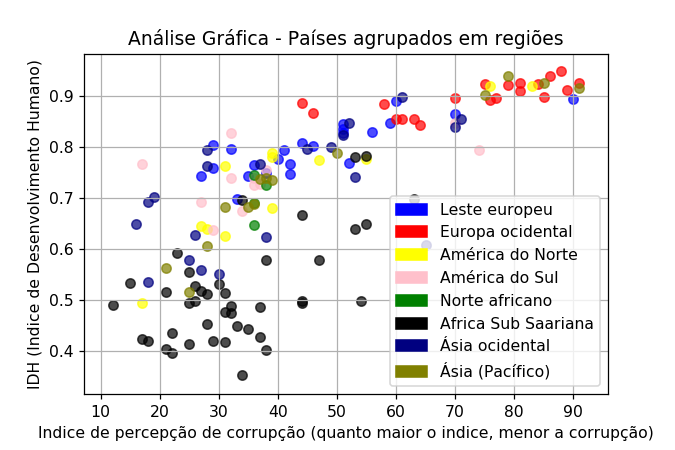

In [17]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.scatter(regioes.CPI[regioes.region=='europe_east'],regioes.IDH[regioes.region=='europe_east'],c='blue',marker='o',alpha=0.7)
plt.scatter(regioes.CPI[regioes.region=='europe_west'],regioes.IDH[regioes.region=='europe_west'],c='red',marker='o',alpha=0.7)
plt.scatter(regioes.CPI[regioes.region=='america_north'],regioes.IDH[regioes.region=='america_north'],c='yellow',marker='o',alpha=0.7)
plt.scatter(regioes.CPI[regioes.region=='america_south'],regioes.IDH[regioes.region=='america_south'],c='pink',marker='o',alpha=0.7)
plt.scatter(regioes.CPI[regioes.region=='africa_north'], regioes.IDH[regioes.region=='africa_north'],c='green',marker='o',alpha=0.7)
plt.scatter(regioes.CPI[regioes.region=='africa_sub_saharan'],regioes.IDH[regioes.region=='africa_sub_saharan'],c='black',marker='o',alpha=0.7)
plt.scatter(regioes.CPI[regioes.region=="asia_west"], regioes.IDH[regioes.region=="asia_west"],c='navy',marker='o',alpha=0.7)
plt.scatter(regioes.CPI[regioes.region=='east_asia_pacific'],regioes.IDH[regioes.region=='east_asia_pacific'],c='olive',marker='o',alpha=0.7)

#Criando as legendas 
plt.title('Análise Gráfica - Países agrupados em regiões')
plt.xlabel('Indice de percepção de corrupção (quanto maior o indice, menor a corrupção)')
plt.ylabel('IDH (Indice de Desenvolvimento Humano)')


blue_patch = mpatches.Patch(color='blue', label='Leste europeu')
red_patch = mpatches.Patch(color='red', label='Europa ocidental')
yellow_patch = mpatches.Patch(color='yellow', label='América do Norte')
pink_patch = mpatches.Patch(color='pink', label='América do Sul')
green_patch = mpatches.Patch(color='green', label='Norte africano')
black_patch = mpatches.Patch(color='black', label='Africa Sub Saariana')
navy_patch = mpatches.Patch(color="navy", label="Ásia ocidental")
olive_patch=mpatches.Patch(color='olive',label='Ásia (Pacífico)')

#Plotando o gráfico conclusivo
plt.legend(handles=[blue_patch,red_patch,yellow_patch,pink_patch,green_patch,black_patch,navy_patch,olive_patch])
plt.grid(True)
plt.show()

### Gráfico de PPU x IDH

<IPython.core.display.Javascript object>


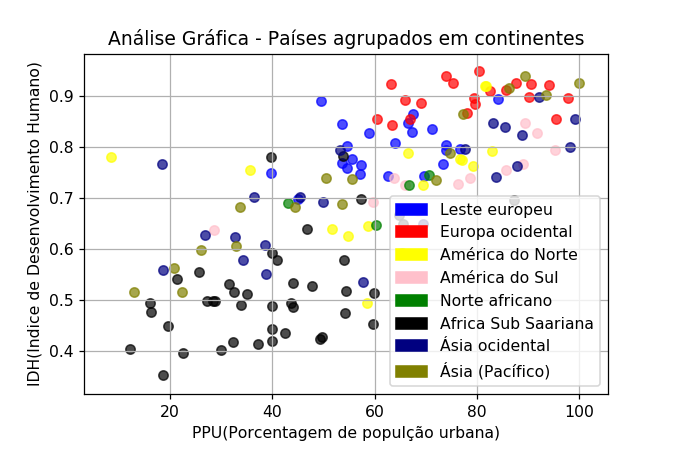

In [16]:
plt.scatter(regioes.PPU[regioes.region=='europe_east'],regioes.IDH[regioes.region=='europe_east'],c='blue',marker='o',alpha=0.7)
plt.scatter(regioes.PPU[regioes.region=='europe_west'],regioes.IDH[regioes.region=='europe_west'],c='red',marker='o',alpha=0.7)
plt.scatter(regioes.PPU[regioes.region=='america_north'],regioes.IDH[regioes.region=='america_north'],c='yellow',marker='o',alpha=0.7)
plt.scatter(regioes.PPU[regioes.region=='america_south'],regioes.IDH[regioes.region=='america_south'],c='pink',marker='o',alpha=0.7)
plt.scatter(regioes.PPU[regioes.region=='africa_north'], regioes.IDH[regioes.region=='africa_north'],c='green',marker='o',alpha=0.7)
plt.scatter(regioes.PPU[regioes.region=='africa_sub_saharan'],regioes.IDH[regioes.region=='africa_sub_saharan'],c='black',marker='o',alpha=0.7)
plt.scatter(regioes.PPU[regioes.region=="asia_west"], regioes.IDH[regioes.region=="asia_west"],c='navy',marker='o',alpha=0.7)
plt.scatter(regioes.PPU[regioes.region=='east_asia_pacific'],regioes.IDH[regioes.region=='east_asia_pacific'],c='olive',marker='o',alpha=0.7)

#Criando as legendas 
plt.title('Análise Gráfica - Países agrupados em continentes')
plt.xlabel('PPU(Porcentagem de populção urbana)')
plt.ylabel('IDH(Indice de Desenvolvimento Humano)')


blue_patch = mpatches.Patch(color='blue', label='Leste europeu')
red_patch = mpatches.Patch(color='red', label='Europa ocidental')
yellow_patch = mpatches.Patch(color='yellow', label='América do Norte')
pink_patch = mpatches.Patch(color='pink', label='América do Sul')
green_patch = mpatches.Patch(color='green', label='Norte africano')
black_patch = mpatches.Patch(color='black', label='Africa Sub Saariana')
navy_patch = mpatches.Patch(color="navy", label="Ásia ocidental")
olive_patch=mpatches.Patch(color='olive',label='Ásia (Pacífico)')
#Plotando o gráfico conclusivo
plt.legend(handles=[blue_patch,red_patch,yellow_patch,pink_patch,green_patch,black_patch,navy_patch,olive_patch])
plt.grid(True)
plt.show()

## Extra: Análise dos índices no ano de 1990

In [14]:
#Selecionando o ano de 1990
dados_IDH_1990=dados_IDH.loc[:,['geo',1990]]
dados_PPU_1990=dados_PPU.loc[:,['geo',1990]]
#Indexando os dataframes
dados_IDHy=dados_IDH_1990.set_index("geo")
dados_PPUy=dados_PPU_1990.set_index('geo')
dados_regiaox=dados_regiao.set_index('Country')
#Juntando a PPU com o IDH
dy =dados_PPUy.join(dados_IDHy, how='inner', lsuffix='_PPU', rsuffix='_IDH')
dy["PPU"] = dy.pop("1990_PPU")
dy["IDH"] = dy.pop("1990_IDH")
regioesy=dy.join(dados_regiaox,how='inner')
#Vamos analisar a correlação
dy.dropna().corr()

,PPU,IDH
PPU,1.000000,0.793156
IDH,0.793156,1.000000


### Gráfico de PPU x IDH

<IPython.core.display.Javascript object>


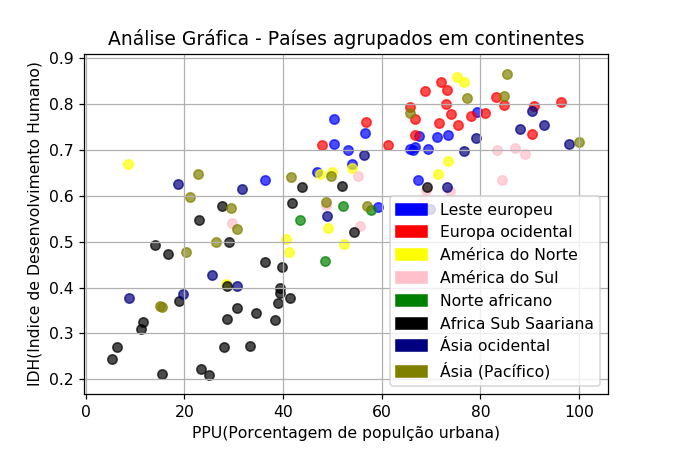

In [18]:
plt.scatter(regioesy.PPU[regioesy.region=='europe_east'],regioesy.IDH[regioesy.region=='europe_east'],c='blue',marker='o',alpha=0.7)
plt.scatter(regioesy.PPU[regioesy.region=='europe_west'],regioesy.IDH[regioesy.region=='europe_west'],c='red',marker='o',alpha=0.7)
plt.scatter(regioesy.PPU[regioesy.region=='america_north'],regioesy.IDH[regioesy.region=='america_north'],c='yellow',marker='o',alpha=0.7)
plt.scatter(regioesy.PPU[regioesy.region=='america_south'],regioesy.IDH[regioesy.region=='america_south'],c='pink',marker='o',alpha=0.7)
plt.scatter(regioesy.PPU[regioesy.region=='africa_north'], regioesy.IDH[regioesy.region=='africa_north'],c='green',marker='o',alpha=0.7)
plt.scatter(regioesy.PPU[regioesy.region=='africa_sub_saharan'],regioesy.IDH[regioesy.region=='africa_sub_saharan'],c='black',marker='o',alpha=0.7)
plt.scatter(regioesy.PPU[regioesy.region=="asia_west"], regioesy.IDH[regioesy.region=="asia_west"],c='navy',marker='o',alpha=0.7)
plt.scatter(regioesy.PPU[regioesy.region=='east_asia_pacific'],regioesy.IDH[regioesy.region=='east_asia_pacific'],c='olive',marker='o',alpha=0.7)

#Criando as legendas 
plt.title('Análise Gráfica - Países agrupados em continentes')
plt.xlabel('PPU(Porcentagem de populção urbana)')
plt.ylabel('IDH(Indice de Desenvolvimento Humano)')


blue_patch = mpatches.Patch(color='blue', label='Leste europeu')
red_patch = mpatches.Patch(color='red', label='Europa ocidental')
yellow_patch = mpatches.Patch(color='yellow', label='América do Norte')
pink_patch = mpatches.Patch(color='pink', label='América do Sul')
green_patch = mpatches.Patch(color='green', label='Norte africano')
black_patch = mpatches.Patch(color='black', label='Africa Sub Saariana')
navy_patch = mpatches.Patch(color="navy", label="Ásia ocidental")
olive_patch=mpatches.Patch(color='olive',label='Ásia (Pacífico)')
#Plotando o gráfico conclusivo
plt.legend(handles=[blue_patch,red_patch,yellow_patch,pink_patch,green_patch,black_patch,navy_patch,olive_patch])
plt.grid(True)
plt.show()

## Conclusão

A partir da análise exploratória dos dados do GapMinder no ano de 2015, conclui-se que a porcentagem de população urbana, assim como o Indice de percepção de corrupção (Corruption perception index no iglês), possuem grande relação com o IDH dos países. Vê-se que a alta taxa de população urbana e a baixa corrupção(alto CPI) estão presentes exatamente naqueles países mais desenvolvidos (com maior IDH), como a maioria dos países da Europa, Estados Unidos, Canadá e os países do Pacífico(Novos Tigres asiáticos, Austrália, Japão e Nova Zelandia). Por outro lado, observa-se uma grande corrupção nos países chamados de "subdesenvolvidos", ou seja, com menor IDH. São exemplos os países da África Subsaariana e da Ásia Ocidental. 
A partir da análise gráfica comprovam-se as correlações antes observadas entre a PPU e a CPI com o IDH (0,721631 e 	0.736817, respectivamente), já que os países desenvolvidos possuem menor corrupção e maior % de população urbana em sua grande maioria, assim a correlação é positiva forte(quando uma variável aumenta, a outra aumenta). Vale lembrar que se fossemos considerar a corrupção propriamente dita e não o Índice de percepção de corrupção (CPI), a correlação IDHxCorrupção seria de -0.736817 e não 0.736817. Fazendo uma análise histórica, vê-se que no ano de 1990 a relação PPU x IDH era mais alta ainda, já que a urbanização nem havia chegado nos países mais subdesenvolvidos. A correlação entre elas (variáveis) é de 0.793156, valor maior do que o observado para o ano de 2015.**Obs: O CPI começou a existir em 2012, logo não havia informações necessária para a análise temporal**.
Em um futuro projeto talvez pudessem ser analisadas outras variáveis relacionadas à cultura ou ao regime governamental, por exemplo.
Para finalizar e responder diretamente a pergunta feita no início do projeto, a alta porcentagem de população urbana e a baixa taxa de corrupção afetam diretamente o Índice de Desenvolvimento Humano (IDH) da grande maioria dos países, apesar de não estarem em sua composição direta.
